In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# word cloud library
from wordcloud import WordCloud
import os 

In [2]:
# reading the file fromt our directory 
df=pd.read_csv('D:\DATA SCIENCE\Data Analytics work\DATASETS\googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
#Count the number of missing values in eacg column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#Changing the column name of the given dataset
df.rename({'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver' },axis=1,inplace=True)

# Tasks

# Data clean up – Missing value treatment

In [9]:
# checking which columns has null values 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [10]:
df[df['Rating'].isnull()].index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [11]:
# dropping the null values from the Rating column
df.drop(index=df[df['Rating'].isnull()].index,inplace=True)

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       3
dtype: int64

# b. Check the null values for the Android Ver column

In [13]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# i. Are all 3 records having the same problem?

Yes, all these 3 records having the same problem in the Andoid Ver column 

# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [14]:
df.drop([10472], inplace=True)

In [15]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


We have successfully droped the 3rd record

# iii. Replace remaining missing values with the mode

In [16]:
# here we are finding the mode value of the Android Ver Column and then storing it in the new variable called x
x=df['Android_Ver'].mode()[0]
x

'4.1 and up'

In [17]:
# filling those null values with the mode() value 
df['Android_Ver'].fillna(x,inplace=True)

In [18]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# c. Current ver – replace with most common value

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       0
dtype: int64

In [20]:
# finding the mode value of the Current Ver column and storing it in the new variable called y
y=df['Current_Ver'].mode()[0]
y

'Varies with device'

In [21]:
# filling the null values with the mode 
df['Current_Ver'].fillna(y, inplace=True)

In [22]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

#  Data clean up – correcting the data types

#  Which all variables need to be brought to numeric types?

In [23]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


From this information, we can see that, the column Reviews, Installs and Price have the numeric data so we can convert
these columns into the numeric types, but there are also 2 columns which are Current Ver and Android Ver can be conevert
into the numeric type but in those columnn there are some strig values which we can drop it or replace it

#  Price variable – remove $ sign and convert to float

In [25]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [26]:
# here we are replacing the $ amd also converting the type of it to the numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

C:\Users\jhaan\AppData\Local\Temp\ipykernel_12048\3908950467.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


#  Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [28]:
# replacing the given condition using this syntax
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace("+",""))

C:\Users\jhaan\AppData\Local\Temp\ipykernel_12048\2538247168.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace("+",""))


In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Here you can see that, there are "," and "+" from the given column 

# d. Convert all other identified columns to numeric¶

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


From the given info, we have already converted the identifies columns into the numeric type so now, there are no such 
columns which we need to convert to numeric type

#  Sanity checks – check for the following and handle accordingly

#  Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

# i. Are there any such records? Drop if so.

In [31]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [32]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


There are no such records which have rating greater than 5, so we don't need to drop anything from the given dataset 

#  Reviews should not be more than installs as only those who installed can review the app.

#  Are there any such records? Drop if so

In [33]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [34]:
# changing the type of the Reviews column
df['Reviews']=pd.to_numeric(df['Reviews'])

In [35]:
sum(df['Reviews']>df['Installs'])

7

In [36]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [37]:
df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [38]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


After performing the operations, we found 7 such records which were greater than the installs so we droped those records
So, now there are no such records that is Review which are greater than the installs

#  Identify and handle outliers –

#  Price column

#  Make suitable plot to identify outliers in price

<Axes: >

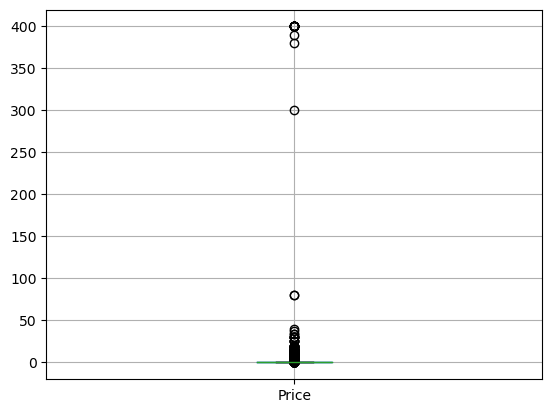

In [39]:
df.boxplot('Price')

So, after ploting the boxplot for the Price column, we can see that there are some outliers present in the price column
And from this we can assume that, there are outliers beyond value 50

#  Do you expect apps on the play store to cost $200? Check out these cases

In [40]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
sum(df['Price']>200)

15

In [42]:
df[df['Price']>200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [43]:
df.drop(index=df[df['Price']>200].index,inplace=True)

In [44]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


Here we have droped the records which are greater than 200 (cost more than 200)

#  After dropping the useless records, make the suitable plot again to identify outliers

In [45]:
df.boxplot('Price')

<Axes: >

After ploting the boxplot for the price column, we got some outliers which we can see and we can say that the outliers 
are beyond 50 or we can also say that there are outliers beyond the average line so we can also drop that 

#  Limit data to records with price < $30

In [46]:
sum(df['Price']<30)

9338

#  Reviews column

#  Make suitable plot

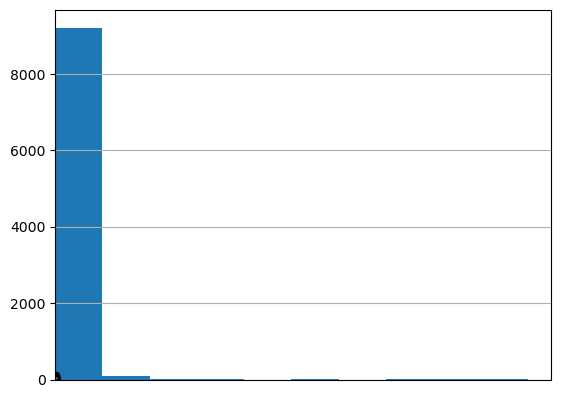

In [47]:
h=df['Reviews']
plt.hist(h)
plt.show()

#  Limit data to apps with < 1 Million reviews

In [48]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [49]:
df[df['Reviews']<1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [50]:
sum(df['Reviews']<1000000)

8640

#  Installs

#  What is the 95th percentile of the installs?

In [51]:
# getting the values of the Installs column with 95th percentile 
df['Installs'].quantile(0.95)

100000000.0

#  Drop records having a value more than the 95th percentile

In [52]:
df['Installs'].quantile(0.95)

100000000.0

In [53]:
df[df['Installs']>df['Installs'].quantile(0.95)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [54]:
df[df['Installs']>df['Installs'].quantile(0.95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [55]:
# here dropping all the values which are more than 95th percentile 
df.drop(index=df[df['Installs']>df['Installs'].quantile(0.95)].index,inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9210 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9210 non-null   object 
 1   Category        9210 non-null   object 
 2   Rating          9210 non-null   float64
 3   Reviews         9210 non-null   int64  
 4   Size            9210 non-null   object 
 5   Installs        9210 non-null   int64  
 6   Type            9210 non-null   object 
 7   Price           9210 non-null   float64
 8   Content_Rating  9210 non-null   object 
 9   Genres          9210 non-null   object 
 10  Last_Updated    9210 non-null   object 
 11  Current_Ver     9210 non-null   object 
 12  Android_Ver     9210 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1007.3+ KB


# Data analysis to answer business questions

# What is the distribution of ratings like and what is the average rating?  More skewed towards higher/lower values?

In [75]:
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

Average Rating: 4.1900108577633


C:\Users\jhaan\AppData\Local\Temp\ipykernel_12048\2919852989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rating)


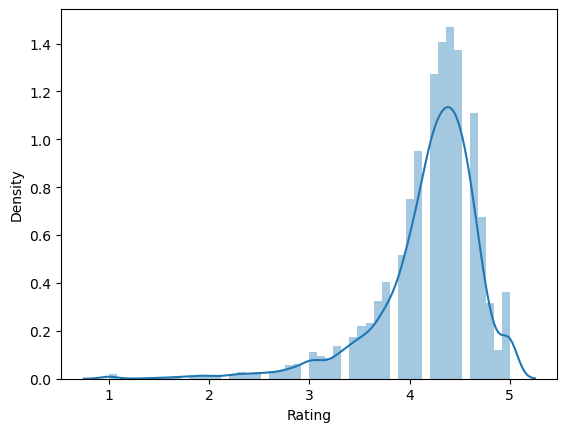

In [56]:
sns.distplot(df.Rating)
plt.show()

In [57]:
# finding the skewed value for a Rating column
df['Rating'].skew()

-1.8416513505231236

#  How do you explain this?

So, from the above plot we can see that the skewed value is at the left side which is negative, so we can say that the given column or the given plot is left skewed

#  What is the implication of this on your analysis?

If we have more data then generally there is skewed value present in that dataset.And if there is too many skewed values present in the dataset that is too much skewness present in the coloumn then whatever the model we have, it does't work properly (Statistical Model) So, if we have skewness data and if it's at the right side then it is right skewed data and if the skewness is at the left side then it is left skewed data that is ther are negative values So, to overcome from this and to get the right output from the analysis we can remove this skewness and we can convert it into the bell curve that is the mean is at the centre

#  What are the top Content Rating values?

In [58]:
df['Content_Rating'].value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

#  Are there any values with very few records?

In [59]:
df['Content_Rating'].value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

So, after analysis we found that an Adults only 18+ and Unrated have very few records that is 3 and 1 respectively

#  If yes, drop those as they won’t help in the analysis

In [60]:
# finding the Unrated value in the contect rating column
df[df['Content_Rating']=='Unrated'].index

Int64Index([8266], dtype='int64')

In [61]:
# finding the Adults only 18+ value in the contect rating column
df[df['Content_Rating']=='Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [62]:
# droping all the values in the given column with given records
df.drop(index=df[df['Content_Rating']=='Unrated'].index, inplace=True)
df.drop(index=df[df['Content_Rating']=='Adults only 18+'].index,inplace=True)

In [63]:
df['Content_Rating'].value_counts()

Everyone        7309
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content_Rating, dtype: int64

So, after the operations we found that, the given data doesn't have any value in the Content Rating column with Unrated and Adults only 18+

# Effect of size on rating

#  Are apps with higher ratings generally larger in size, or does size negatively affect ratings?

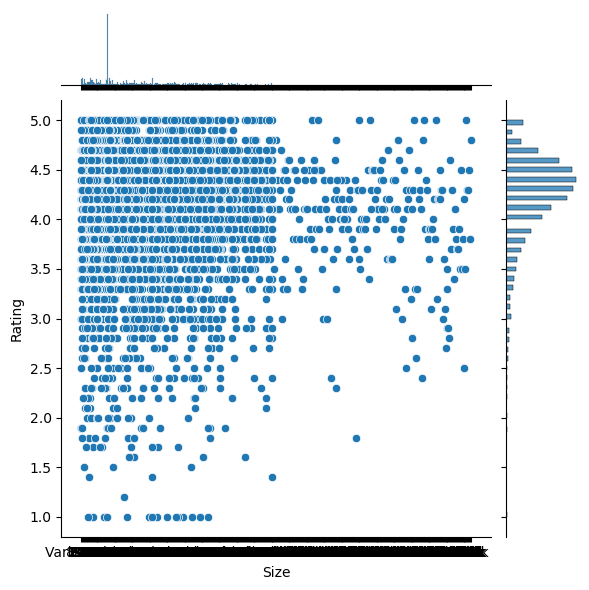

In [64]:
sns.jointplot(x='Size',y='Rating',data=df)
plt.show()

#  Do you see any patterns?

Yes, from the given plot, we can say that there is correlation between Size and Rating

#  How do you explain the pattern?

From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

#  Effect of price on rating

#  Are apps with higher prices generally rated better, or does size negatively affect ratings?

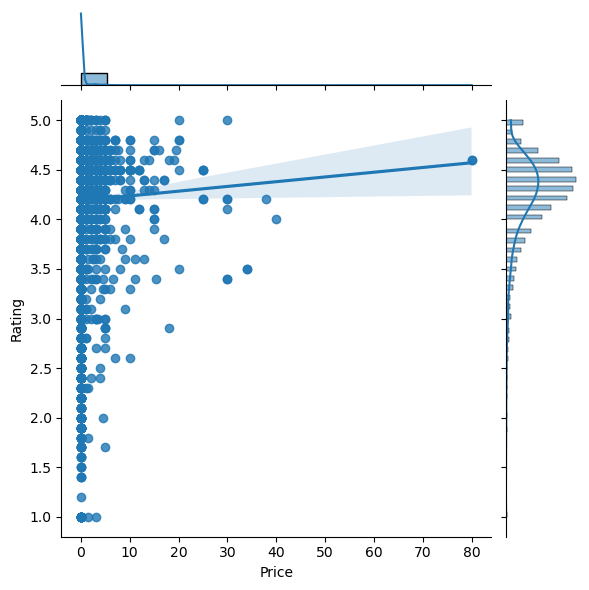

In [65]:
sns.jointplot(x='Price',y='Rating',data=df, kind='reg')
plt.show()

#  What pattern do you see?

From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

#  How do you explain the pattern?

So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price

#  Replot the data, this time with only records with price > 0

In [66]:
greatervalue=df[df['Price']>0]
greatervalue

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36M,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


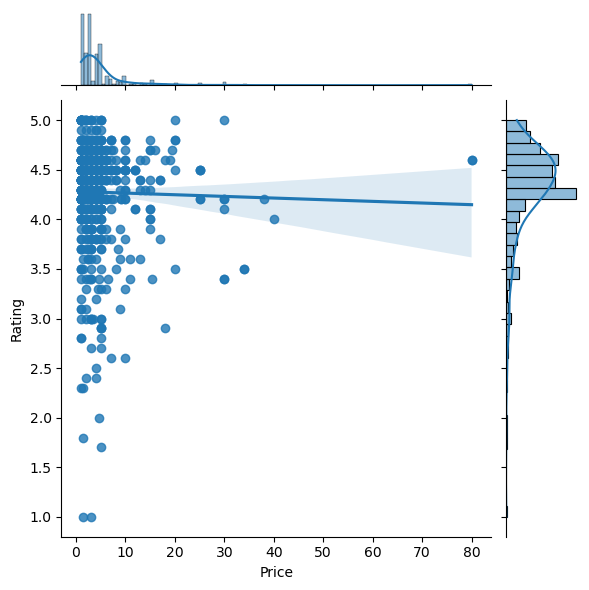

In [67]:
sns.jointplot(x='Price',y='Rating',data=greatervalue, kind='reg')
plt.show()

#  Does the pattern change?

Yes, the pattern has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

#  What is your overall inference on the effect of price on the rating

So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

#  Look at all the numeric interactions together –

#  Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

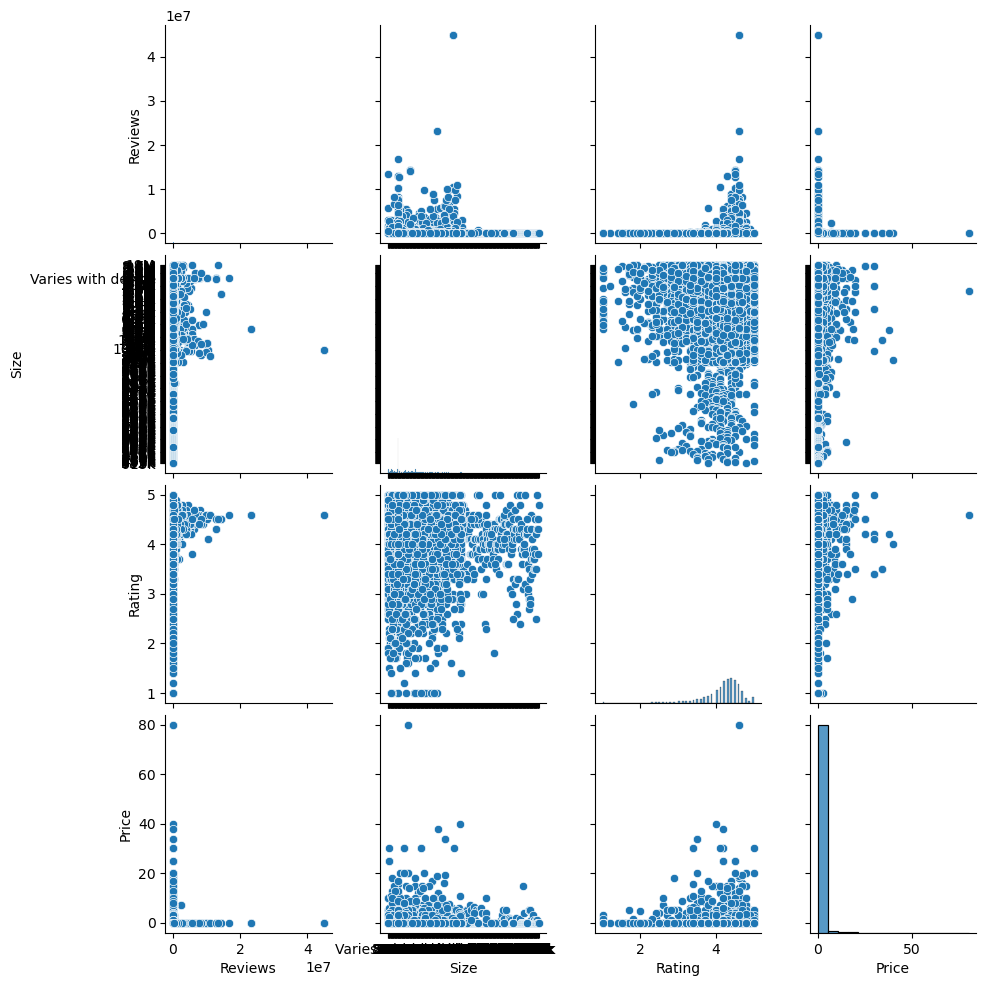

In [68]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'])
plt.show()

#  Rating vs. content rating

#  Make a bar plot displaying the rating for each content rating

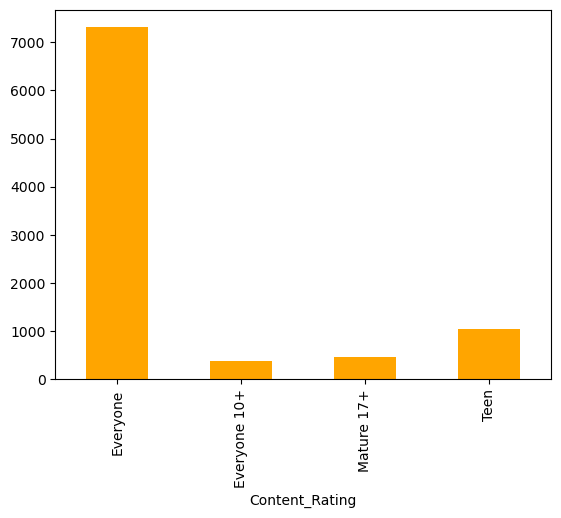

In [69]:
df.groupby(['Content_Rating'])['Rating'].count().plot.bar(color='orange')
plt.show()

#  Which metric would you use? Mean? Median? Some other quantile?

Here, we will use Median as we have outlier in the Rating. And, Median is the best measure of central tendency to overcome
the outlier

#  Choose the right metric and plot

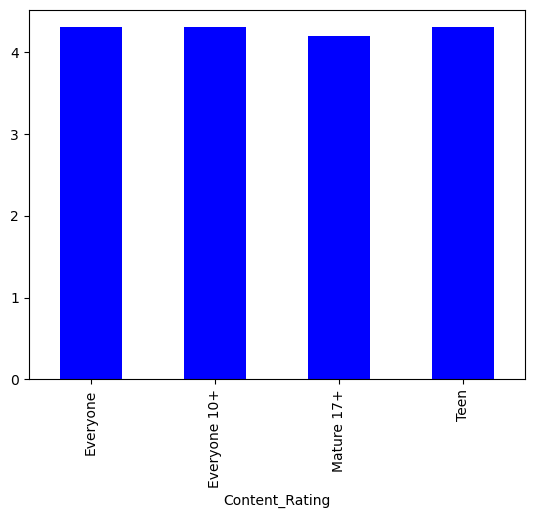

In [70]:
df.groupby(['Content_Rating'])['Rating'].median().plot.bar(color='blue')
plt.show()

# What is Average Rating Per Category?

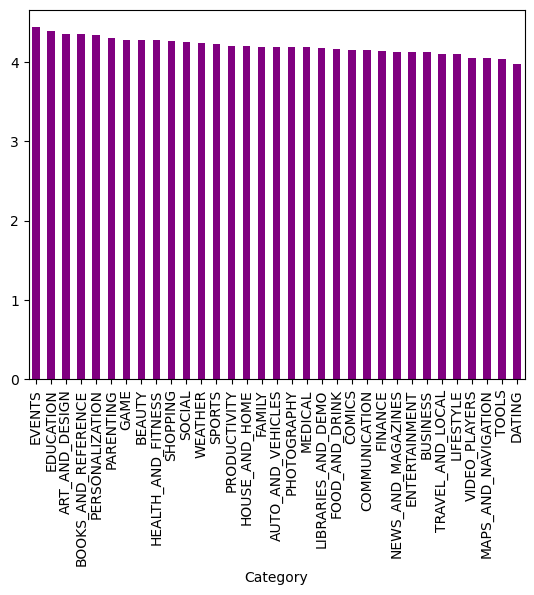

In [95]:
d1=df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
d1.plot(kind='bar',color='purple')
plt.show()

In [82]:
df['Type'].value_counts()

Free    8581
Paid     629
Name: Type, dtype: int64

# How does price influence the number of installs for paid apps?

In [85]:
df_paid=df[df['Type']=='Paid']
df_paid.groupby('Category')['Price'].mean().sort_values(ascending=False)

Category
MEDICAL                11.853864
BUSINESS                6.762727
LIFESTYLE               6.535833
DATING                  5.740000
FINANCE                 5.704286
MAPS_AND_NAVIGATION     5.390000
PHOTOGRAPHY             4.902222
PARENTING               4.790000
TRAVEL_AND_LOCAL        4.686250
EDUCATION               4.490000
FAMILY                  4.473291
FOOD_AND_DRINK          4.240000
SPORTS                  4.236818
WEATHER                 4.204286
ENTERTAINMENT           3.990000
PRODUCTIVITY            3.940000
HEALTH_AND_FITNESS      3.781667
GAME                    3.705067
TOOLS                   3.300000
BOOKS_AND_REFERENCE     2.985000
SHOPPING                2.740000
VIDEO_PLAYERS           2.615000
COMMUNICATION           2.576818
NEWS_AND_MAGAZINES      1.990000
AUTO_AND_VEHICLES       1.990000
ART_AND_DESIGN          1.990000
PERSONALIZATION         1.906866
SOCIAL                  0.990000
Name: Price, dtype: float64

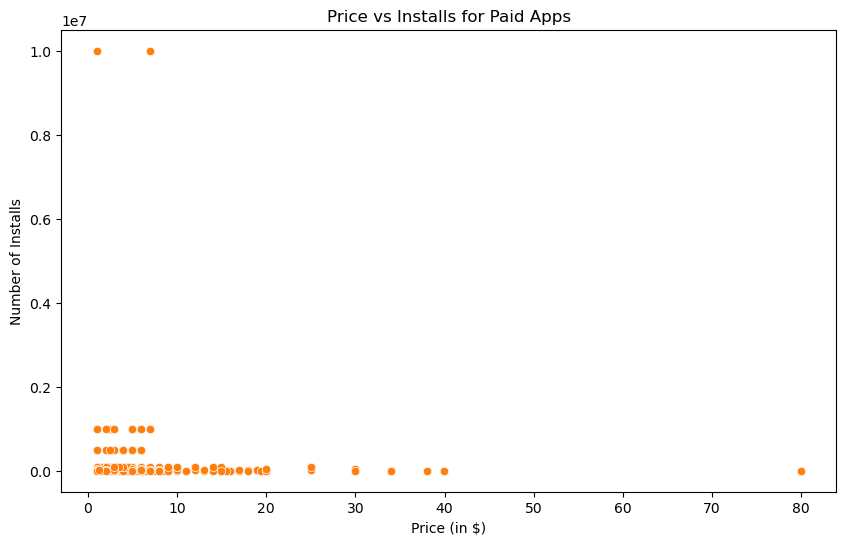

In [89]:

sns.scatterplot(x='Price', y='Installs', data=df_paid)
plt.title('Price vs Installs for Paid Apps')
plt.xlabel('Price (in $)')
plt.ylabel('Number of Installs')
plt.show()


# Are there any significant differences in ratings and installs between free and paid apps?

In [92]:
df_free = df[df['Type'] == 'Free']
df_paid = df[df['Type'] == 'Paid']

# Step 3: Summary Statistics
print("Summary Statistics - Ratings:")
print(f"Free Apps - Mean: {df_free['Rating'].mean()}, Median: {df_free['Rating'].median()}")
print(f"Paid Apps - Mean: {df_paid['Rating'].mean()}, Median: {df_paid['Rating'].median()}")

print("\nSummary Statistics - Installs:")
print(f"Free Apps - Mean: {df_free['Installs'].mean()}, Median: {df_free['Installs'].median()}")
print(f"Paid Apps - Mean: {df_paid['Installs'].mean()}, Median: {df_paid['Installs'].median()}")

Summary Statistics - Ratings:
Free Apps - Mean: 4.183929611933341, Median: 4.3
Paid Apps - Mean: 4.272972972972973, Median: 4.4

Summary Statistics - Installs:
Free Apps - Mean: 8571549.39167929, Median: 500000.0
Paid Apps - Mean: 115601.71701112877, Median: 5000.0


#  What are the most popular genres in terms of installs, and how do they compare in average ratings? 

Top 10 most popular genres by installs:
            Genres    Installs    Rating
0           Action  6342037470  4.285227
79     Photography  6088243130  4.188179
80    Productivity  5176070180  4.205341
34   Communication  5147241530  4.146233
105          Tools  4940674500  4.040777
6           Arcade  4727077710  4.284264
93        Shopping  3247831540  4.259664
98          Social  3069841465  4.254098
50   Entertainment  3064099720  4.088805
99          Sports  2866131465  4.235843


C:\Users\jhaan\AppData\Local\Temp\ipykernel_12048\1246677346.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_genres['Genres'], rotation=45, ha='right')


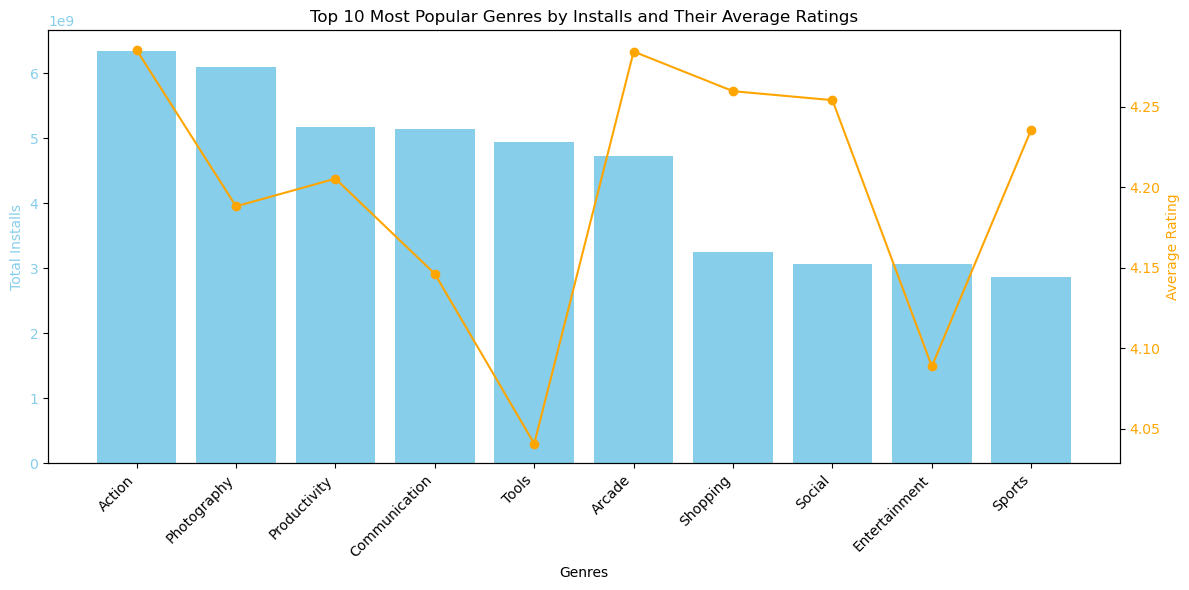

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the Google Play Store data

# Step 1: Group by Genres and calculate total installs and average rating for each genre
genre_group = df.groupby('Genres').agg({
    'Installs': 'sum',   # Total installs per genre
    'Rating': 'mean'     # Average rating per genre
}).reset_index()

# Step 2: Sort genres by total installs
top_genres = genre_group.sort_values(by='Installs', ascending=False)

# Display the top 10 most popular genres
print("Top 10 most popular genres by installs:")
print(top_genres[['Genres', 'Installs', 'Rating']].head(10))

# Step 3: Visualize the top 10 genres by installs and their average ratings

# Get the top 10 genres for visualization
top_10_genres = top_genres.head(10)

# Create a bar plot for Installs and a line plot for Ratings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total installs
ax1.bar(top_10_genres['Genres'], top_10_genres['Installs'], color='skyblue', label='Total Installs')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Total Installs', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Top 10 Most Popular Genres by Installs and Their Average Ratings')
ax1.set_xticklabels(top_10_genres['Genres'], rotation=45, ha='right')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(top_10_genres['Genres'], top_10_genres['Rating'], color='orange', label='Average Rating', marker='o')
ax2.set_ylabel('Average Rating', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show plot
plt.tight_layout()
plt.show()


# Which genres tend to have more paid apps

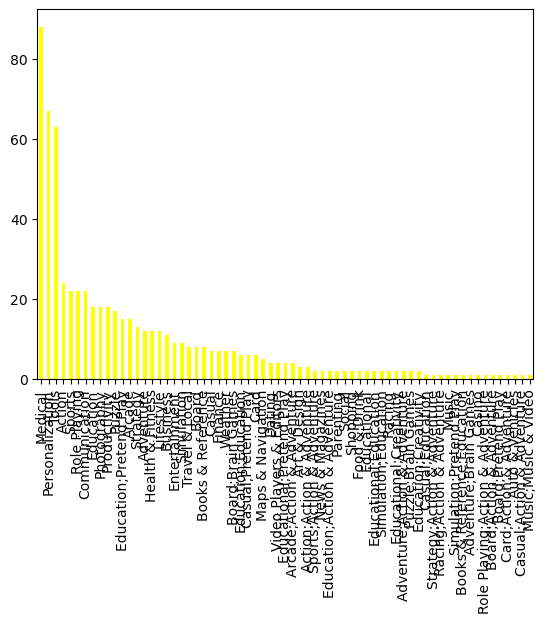

In [98]:

df_paid['Genres'].value_counts().plot(kind='bar',color='yellow')
plt.show()

# i. Annotated

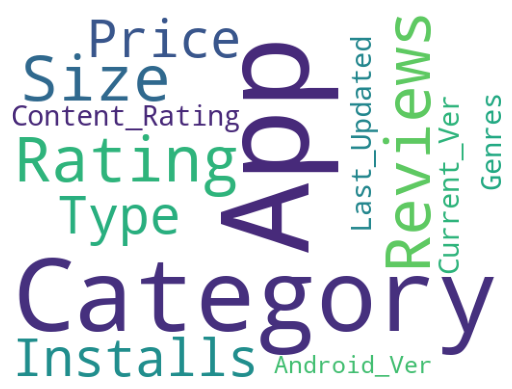

In [91]:

wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()